# Homework 3
#### Jennefer Maldonado

This jupyter notebook contains three numerical schemes:
1. Lax Wendroff Scheme
2. Beam-Warming Scheme
3. Leapfrog Scheme

The initial conditions are computed in the first cell and then passed as parameters for each of the schemes instead of computing them multiple times. There are four graphs for the Lax Wendroff Scheme and Leapfrog Scheme, representing the time steps and initial conditions used. There are eight graphs for the Beam-Warming Scheme to account for the change in $\Delta t$. The total variation for each example is ABOVE each plot but the error (2 and $\infty$) is BELOW each. At the end of the graphs is the information about the convergence order of the scheme. Also, only the approximate solutions are plotted. The discussion for each scheme comes below the graphs for each scheme.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def cos_IC(N, xmin, dx):
    # initial condition
    x=[] #x step values
    u=[] #v values
    for i in range(1,N+1):
        x.append(xmin+(i-1)*dx)
        if x[i-1] >= -0.5 and x[i-1] <= 0.5:
            u.append(math.cos(math.pi*(x[i-1]-1))**2)
        else: 
            u.append(0)
    return [x,u]
    
def IC(N, xmin, dx):
    # initial condition
    x=[] #x step values
    u=[] #v values
    for i in range(1,N+1):
        x.append(xmin+(i-1)*dx)
        if x[i-1] >= -0.5 and x[i-1] <= 0.5:
            u.append(1)
        else: 
            u.append(0)
    return [x, u]

# Max x value
xmax = 5
# Min x value
xmin = -5
# Max t value
t_max = 20
# time steps
N250 = 250
N500 = 500

 # delta x
dx250 = (xmax-xmin)/(N250-1.0)
 # delta x
dx500 = (xmax-xmin)/(N500-1.0)

# delta t
dt250 = 0.75*dx250
# delta t (for beam warming scheme)
dt250BW = 1.75*dx250

# delta t
dt500 = 0.75*dx500
# delta t (for beam warming scheme)
dt500BW = 1.75*dx500

# initial conditions - 250
x250, u250 = IC(N500, xmin, dx250)
x_cos250 , u_cos250 = cos_IC(N250, xmin, dx250)

# initial conditions - 500
x500, u500 = IC(N500, xmin, dx500)
x_cos500 , u_cos500 = cos_IC(N500, xmin, dx500)



Total Variation: 3.7502879894536747


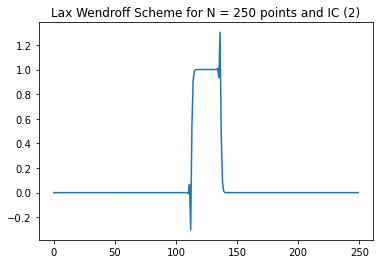

2-norm error:0.05019075609449148
inf-norm error:0.029026109474342338

Total Variation: 3.2002246064473647


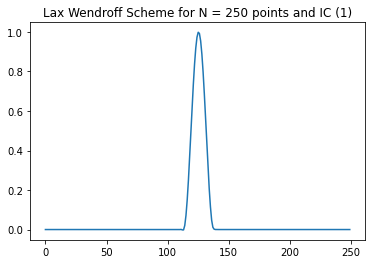

2-norm error:0.022381480052287867
inf-norm error:0.006337335777470804

Total Variation: 1.7516772536713834


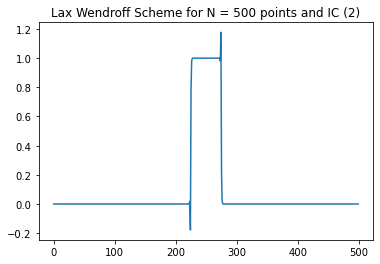

2-norm error:0.017868722750808714
inf-norm error:0.009736270633829609

Total Variation: 1.6011901770704768


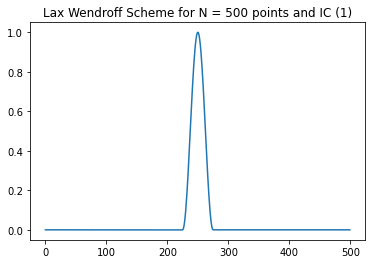

2-norm error:0.005622965646002161
inf-norm error:0.0011253901805422996

Convergence Order for first IC type
The convergence order for 2-norm is 2.866853388481604
The convergence order for infinity-norm is 3.586908870427143

Convergence Order for Second IC type
The convergence order for 2-norm is 0.46733429145185423
The convergence order for infinity-norm is -0.8911601266140443


In [2]:
def Lax_Wendroff(N, t, tmax, u, dx, dt, xvals, type_ic):
    prev = u
    TV = 0
    # LAX WENDROFF SCHEME
    while t < tmax:
        u_n = []
        # update solution
        for k in range(1,N-1):
            u_n.append(u[k] - (dt/2*dx)*(u[k+1]-u[k-1]) + (dt**2/2*dx**2)*(u[k+1]-2*u[k]+u[k-1]))
        
        # Periodic boundary conditions
        u_n.insert(0, u[N-3])
        u_n.append(u[N-2])
        
        if (len(prev) == len(u_n)):
            for i in range(0, len(prev)):
                TV += abs(u_n[i] - prev[i])
        
        # update state for next time step
        prev = u
        u = u_n
        # new time
        t = t + dt
    
    print()
    print(f'Total Variation: {TV}')
    
    # compute analytic solution at t   
    actual = []
    if type_ic == 'cos':
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(math.cos(math.pi*(xvals[i-1]-1))**2)
            else: 
                actual.append(0)
    else:
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(1)
            else: 
                actual.append(0)
        
    sub= []
    for i in range(0, len(u)):
        sub.append(u[i]-actual[i])
    # CHANGE NORM HERE (default is 2 norm)
    norm2 = np.linalg.norm(sub)
    # infinity norm
    norm_inf = np.linalg.norm(sub, np.inf)
    error2 = norm2/math.sqrt(N)
    error_inf = norm_inf/math.sqrt(N)
    return [error2, error_inf, u, dx]


err2502, inf_err2502, ULW250, LW250_dx2 = Lax_Wendroff(N250, 0, t_max, u250, dx250, dt250, x250, 'ic')
plt.plot(ULW250)
plt.title('Lax Wendroff Scheme for N = 250 points and IC (2)')
plt.show()
print(f'2-norm error:{err2502}')
print(f'inf-norm error:{inf_err2502}')

err2501, inf_err2501, ULW_cos250, LW250_dx1 = Lax_Wendroff(N250, 0, t_max, u_cos250, dx250, dt250, x250, 'cos')
plt.plot(ULW_cos250)
plt.title('Lax Wendroff Scheme for N = 250 points and IC (1)')
plt.show()
print(f'2-norm error:{err2501}')
print(f'inf-norm error:{inf_err2501}')

err5002, inf_err5002, ULW500, LW500_dx2 = Lax_Wendroff(N500, 0, t_max, u500, dx500, dt500, x500, 'ic')
plt.plot(ULW500)
plt.title('Lax Wendroff Scheme for N = 500 points and IC (2)')
plt.show()
print(f'2-norm error:{err5002}')
print(f'inf-norm error:{inf_err5002}')

err5001, inf_err5001, ULW_cos500, LW500_dx1 = Lax_Wendroff(N500, 0, t_max, u_cos500, dx500, dt500, x500, 'cos')
plt.plot(ULW_cos500)
plt.title('Lax Wendroff Scheme for N = 500 points and IC (1)')
plt.show()
print(f'2-norm error:{err5001}')
print(f'inf-norm error:{inf_err5001}')
print()

print( "Convergence Order for first IC type")
LW_err1 = err5001/err2501
LW_delx1 = LW500_dx1/LW250_dx1
R12 = math.log(LW_err1, 2)/math.log(LW_delx1)
print('The convergence order for 2-norm is '+ str(R12))
LW_err1_inf = inf_err5001/inf_err2501
LW_delx1_inf = LW500_dx1/LW250_dx1
R12_inf = math.log(LW_err1_inf, 2)/math.log(LW_delx1_inf)
print('The convergence order for infinity-norm is '+ str(R12_inf))
print()
print("Convergence Order for Second IC type")
LW_err2 = err5002/err2501
LW_delx2 = LW500_dx2/LW250_dx2
R22 = math.log(LW_err2, 2)/math.log(LW_delx2)
print('The convergence order for 2-norm is '+ str(R22))
LW_err2_inf = inf_err5002/inf_err2501
LW_delx2_inf = LW500_dx2/LW250_dx2
R22_inf = math.log(LW_err2_inf, 2)/math.log(LW_delx2_inf)
print('The convergence order for infinity-norm is '+ str(R22_inf))

## Analysis of Lax Wendroff Scheme
The Lax Wendroff seems to be the most accurate due to the graphs. The small errors in both $\Delta 2$ and $\infty$ norms validate that conclusion. The second initial condition yields a lower order of convergence and the total variation is low in line with the lack of oscillations throughout. This scheme has the best total variation of all. This yields the hypothesis that this is the most accurate scheme for the advection equation.


Total Variation: 15778.818771437225


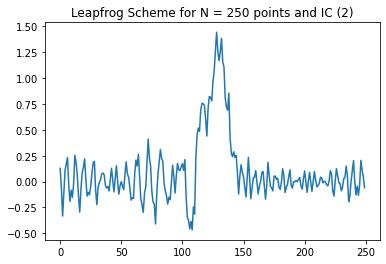

2-norm error:0.1831483668992758
inf-norm error:0.0539828270808522

Total Variation: 2771.2672521075083


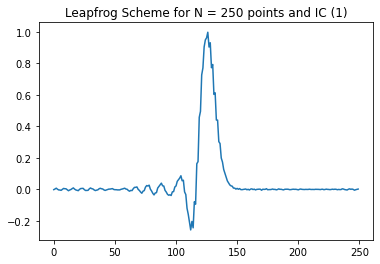

2-norm error:0.07005987816752034
inf-norm error:0.02038760753609165

Total Variation: 44521.22317831618


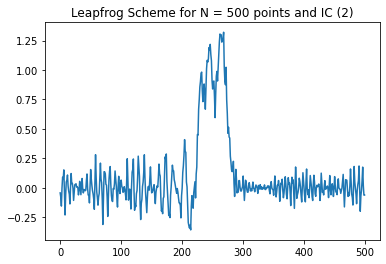

2-norm error:0.12811718146108764
inf-norm error:0.024683071896205826

Total Variation: 4625.837921428342


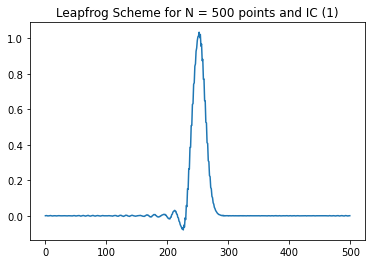

2-norm error:0.03704905380907175
inf-norm error:0.007831100604709313
Convergence Order for first IC type
The convergence order for 2-norm is 1.3222290885956585
The convergence order for infinity-norm is 1.9857572413164366

Convergence Order for Second IC type
The convergence order for 2-norm is -1.2526786630268716
The convergence order for infinity-norm is -0.39678946728657694


In [3]:
def leapfrog(N, t, tmax, u, dx, dt, xvals, type_ic):
    prev = u
    TV = 0
    while t < tmax:
        u_n = []
        # update solution
        for k in range(1,N-1):
            u_n.append(prev[k] - (dt/dx)*(u[k+1] - u[k-1]))
        
        # boundary conditions
        # Periodic boundary conditions
        u_n.insert(0, u[N-3])
        u_n.append(u[N-2])
        
        if (len(prev) == len(u_n)):
            for i in range(0, len(prev)):
                TV += abs(u_n[i] - prev[i])
        
        # update state for next time step
        prev = u
        u = u_n
        # new time
        t = t + dt
    print()
    print(f'Total Variation: {TV}')
     # compute analytic solution at t   
    actual = []
    if type_ic == 'cos':
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(math.cos(math.pi*(xvals[i-1]-1))**2)
            else: 
                actual.append(0)
    else:
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(1)
            else: 
                actual.append(0)

    sub= []
    for i in range(0, len(u)):
        sub.append(u[i]-actual[i])
    # CHANGE NORM HERE (default is 2 norm)
    norm2 = np.linalg.norm(sub)
    # infinity norm
    norm_inf = np.linalg.norm(sub, np.inf)
    error2 = norm2/math.sqrt(N)
    error_inf = norm_inf/math.sqrt(N)
    return [error2, error_inf, u, dx]

LFerr2502, LFinf_err2502, ULF250, LF250_dx2 = leapfrog(N250, 0, t_max, u250, dx250, dt250, x250, 'ic')
plt.plot(ULF250)
plt.title('Leapfrog Scheme for N = 250 points and IC (2)')
plt.show()
print(f'2-norm error:{LFerr2502}')
print(f'inf-norm error:{LFinf_err2502}')

LFerr2501, LFinf_err2501, ULF_cos250 , LF250_dx1= leapfrog(N250, 0, t_max, u_cos250, dx250, dt250, x250, 'cos')
plt.plot(ULF_cos250)
plt.title('Leapfrog Scheme for N = 250 points and IC (1)')
plt.show()
print(f'2-norm error:{LFerr2501}')
print(f'inf-norm error:{LFinf_err2501}')

LFerr5002, LFinf_err5002, ULF500, LF500_dx2= leapfrog(N500, 0, t_max, u500, dx500, dt500, x500, 'ic')
plt.plot(ULF500)
plt.title('Leapfrog Scheme for N = 500 points and IC (2)')
plt.show()
print(f'2-norm error:{LFerr5002}')
print(f'inf-norm error:{LFinf_err5002}')

LFerr5001, LFinf_err5001, ULF_cos500, LF500_dx1= leapfrog(N500, 0, t_max, u_cos500, dx500, dt500, x500, 'cos')
plt.plot(ULF_cos500)
plt.title('Leapfrog Scheme for N = 500 points and IC (1)')
plt.show()
print(f'2-norm error:{LFerr5001}')
print(f'inf-norm error:{LFinf_err5001}')

print( "Convergence Order for first IC type")
LF_err1 = LFerr5001/LFerr2501
LF_delx1 = LF500_dx1/LF250_dx1
LFR12 = math.log(LF_err1, 2)/math.log(LF_delx1)
print('The convergence order for 2-norm is '+ str(LFR12))
LF_err1_inf = LFinf_err5001/LFinf_err2501
LF_delx1_inf = LF500_dx1/LF250_dx1
LFR12_inf = math.log(LF_err1_inf, 2)/math.log(LF_delx1_inf)
print('The convergence order for infinity-norm is '+ str(LFR12_inf))
print()
print("Convergence Order for Second IC type")
LF_err2 = LFerr5002/LFerr2501
LF_delx2 = LF500_dx2/LF250_dx2
LFR22 = math.log(LF_err2, 2)/math.log(LF_delx2)
print('The convergence order for 2-norm is '+ str(LFR22))
LF_err2_inf = LFinf_err5002/LFinf_err2501
LF_delx2_inf = LF500_dx2/LF250_dx2
LFR22_inf = math.log(LF_err2_inf, 2)/math.log(LF_delx2_inf)
print('The convergence order for infinity-norm is '+ str(LFR22_inf))

## Analysis of Leapfrog Scheme
The leapfrog scheme has much more oscillations which is confirmed by the large total variation in each run of the method. The convergence order and errors remain alright but the oscillations take away from the accuracy of this scheme.


Total Variation: 1063.5235387135706


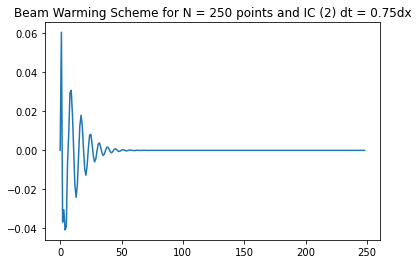

2-norm error:0.3099282775680052
inf-norm error:0.06324555350190293

Total Variation: 562.1207898926954


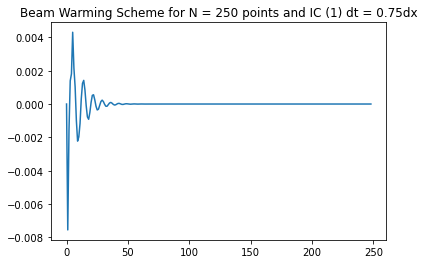

2-norm error:0.19326258075340833
inf-norm error:0.06299419395421949

Total Variation: 2366.3876364553844


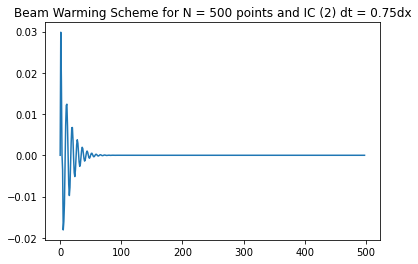

2-norm error:0.31623661794101215
inf-norm error:0.044721359549995815

Total Variation: 1046.809232324635


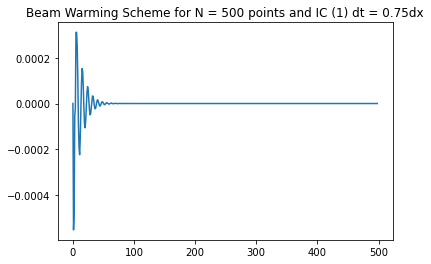

2-norm error:0.19345542672249819
inf-norm error:0.04467705888907313
Convergence Order for first IC type dt = 0.75dx
The convergence order for 2-norm is -0.002069856392333903
The convergence order for infinity-norm is 0.7130581421770834

Convergence Order for Second IC type dt = 0.75dx
The convergence order for 2-norm is -0.041818177767117146
The convergence order for infinity-norm is 0.7192659219908144

Total Variation: 1327.4159582383136


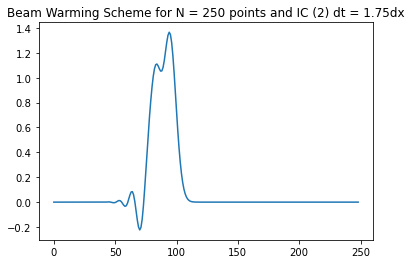

2-norm error:0.46104610247832667
inf-norm error:0.08635841608436133

Total Variation: 942.6292989715748


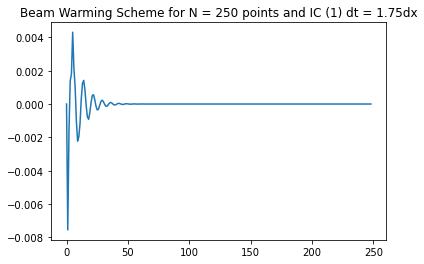

2-norm error:0.19326258075340833
inf-norm error:0.06299419395421949

Total Variation: 2893.355643437697


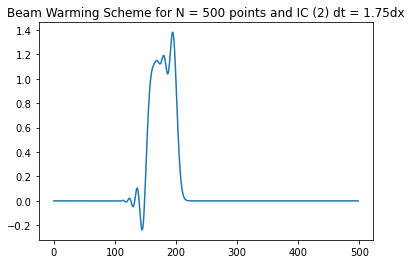

2-norm error:0.4748272909224125
inf-norm error:0.06174034165713814

Total Variation: 1853.8794756359246


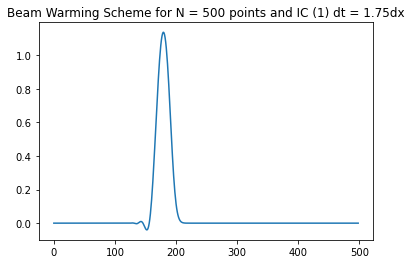

2-norm error:0.2933651511858373
inf-norm error:0.05084586378543579
Convergence Order for first IC type dt = 1.75dx
The convergence order for 2-norm is -0.8661906071197695
The convergence order for infinity-norm is 0.4446335663275503

Convergence Order for Second IC type dt = 1.75dx
The convergence order for 2-norm is -0.06112585870748609
The convergence order for infinity-norm is 0.6964267974879723


In [4]:
def Beam_Warming(N, t, tmax, u, dx, dt, xvals, type_ic):
    prev = u
    TV = 0
    while t < tmax:
        u_n = []
        # update solution
        for j in range(2,N-1):
            u_n.append(u[j] - (dt/(2*dx))*(3*u[j] - 4*u[j-1] + u[j-2]) + dt**2/(2*dx**2) *(u[j] - 2*u[j-1] + u[j-2]))
        
        # Periodic boundary conditions
        u_n.insert(0, u[N-3])
        u_n.append(u[N-2])
        
        if (len(prev) == len(u_n)):
            for i in range(0, len(prev)):
                TV += abs(u_n[i] - prev[i])
        
        # update state for next time step
        prev = u
        u = u_n
        # new time
        t = t + dt
    print()
    print(f'Total Variation: {TV}')
    
    # compute analytic solution at t   
    actual = []
    if type_ic == 'cos':
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(math.cos(math.pi*(xvals[i-1]-1))**2)
            else: 
                actual.append(0)
    else:
        for i in range(1,N+1):
            if xvals[i-1] >= -0.5 and xvals[i-1] <= 0.5:
                actual.append(1)
            else: 
                actual.append(0)

    sub= []
    for i in range(0, len(u)):
        sub.append(u[i]-actual[i])
    # CHANGE NORM HERE (default is 2 norm)
    norm2 = np.linalg.norm(sub)
    # infinity norm
    norm_inf = np.linalg.norm(sub, np.inf)
    error2 = norm2/math.sqrt(N)
    error_inf = norm_inf/math.sqrt(N)
    return [error2, error_inf, u, dx]


BW2502err2, BW2502err_inf, UBW250, BW_dx_250_2 = Beam_Warming(N250, 0, t_max, u250, dx250, dt250, x250, 'ic')
plt.plot(UBW250)
plt.title('Beam Warming Scheme for N = 250 points and IC (2) dt = 0.75dx')
plt.show()
print(f'2-norm error:{BW2502err2}')
print(f'inf-norm error:{BW2502err_inf}')

BW2501err2, BW2501err_inf, UBW_cos250, BW_dx_250_1 = Beam_Warming(N250, 0, t_max, u_cos250, dx250, dt250, x250, 'cos')
plt.plot(UBW_cos250)
plt.title('Beam Warming Scheme for N = 250 points and IC (1) dt = 0.75dx')
plt.show()
print(f'2-norm error:{BW2501err2}')
print(f'inf-norm error:{BW2501err_inf}')

BW5002err2, BW5002err_inf, UBW500, BW_dx_500_2 = Beam_Warming(N500, 0, t_max, u500, dx500, dt500, x500, 'ic')
plt.plot(UBW500)
plt.title('Beam Warming Scheme for N = 500 points and IC (2) dt = 0.75dx')
plt.show()
print(f'2-norm error:{BW5002err2}')
print(f'inf-norm error:{BW5002err_inf}')

BW5001err2, BW5001err_inf, UBW_cos500, BW_dx_500_1 = Beam_Warming(N500, 0, t_max, u_cos500, dx500, dt500, x500, 'cos')
plt.plot(UBW_cos500)
plt.title('Beam Warming Scheme for N = 500 points and IC (1) dt = 0.75dx')
plt.show()
print(f'2-norm error:{BW5001err2}')
print(f'inf-norm error:{BW5001err_inf}')

print( "Convergence Order for first IC type dt = 0.75dx")
BW_err1 = BW5001err2/BW2501err2
BW_delx1 = BW_dx_500_1/BW_dx_250_1
BWR12 = math.log(BW_err1, 2)/math.log(BW_delx1)
print('The convergence order for 2-norm is '+ str(BWR12))
BW_err1_inf = BW5001err_inf/BW2501err_inf
BW_delx1 = BW_dx_500_1/BW_dx_250_1
BWR12_inf = math.log(BW_err1_inf, 2)/math.log(BW_delx1)
print('The convergence order for infinity-norm is '+ str(BWR12_inf))
print()
print("Convergence Order for Second IC type dt = 0.75dx")
BW_err2 = BW5002err2/BW2502err2
BW_delx2 = BW_dx_500_2/BW_dx_250_2
BWR22 = math.log(BW_err2, 2)/math.log(BW_delx2)
print('The convergence order for 2-norm is '+ str(BWR22))
BW_err2_inf = BW5002err_inf/BW2502err_inf
BW_delx2 = BW_dx_500_2/BW_dx_250_2
BWR22_inf = math.log(BW_err2_inf, 2)/math.log(BW_delx2)
print('The convergence order for infinity-norm is '+ str(BWR22_inf))



BW2502err2, BW2502err_inf, UBW250 , BW_dx_250_2 = Beam_Warming(N250, 0, t_max, u250, dx250, dt250BW, x250, 'ic')
plt.plot(UBW250)
plt.title('Beam Warming Scheme for N = 250 points and IC (2) dt = 1.75dx')
plt.show()
print(f'2-norm error:{BW2502err2}')
print(f'inf-norm error:{BW2502err_inf}')

BW2501err2_175, BW2501err_inf_175, UBW_cos250_175, BW_dx_250_1 = Beam_Warming(N250, 0, t_max, u_cos250, dx250, dt250BW, x250, 'cos')
plt.plot(UBW_cos250)
plt.title('Beam Warming Scheme for N = 250 points and IC (1) dt = 1.75dx')
plt.show()
print(f'2-norm error:{BW2501err2}')
print(f'inf-norm error:{BW2501err_inf}')

BW5002err2, BW5002err_inf, UBW500, BW_dx_500_2 = Beam_Warming(N500, 0, t_max, u500, dx500, dt500BW, x500, 'ic')
plt.plot(UBW500)
plt.title('Beam Warming Scheme for N = 500 points and IC (2) dt = 1.75dx')
plt.show()
print(f'2-norm error:{BW5002err2}')
print(f'inf-norm error:{BW5002err_inf}')

BW5001err2, BW5001err_inf, UBW_cos500, BW_dx_500_1 = Beam_Warming(N500, 0, t_max, u_cos500, dx500, dt500BW, x500, 'cos')
plt.plot(UBW_cos500)
plt.title('Beam Warming Scheme for N = 500 points and IC (1) dt = 1.75dx')
plt.show()
print(f'2-norm error:{BW5001err2}')
print(f'inf-norm error:{BW5001err_inf}')


print( "Convergence Order for first IC type dt = 1.75dx")
BW_err1 = BW5001err2/BW2501err2
BW_delx1 = BW_dx_500_1/BW_dx_250_1
BWR12 = math.log(BW_err1, 2)/math.log(BW_delx1)
print('The convergence order for 2-norm is '+ str(BWR12))
BW_err1_inf = BW5001err_inf/BW2501err_inf
BW_delx1 = BW_dx_500_1/BW_dx_250_1
BWR12_inf = math.log(BW_err1_inf, 2)/math.log(BW_delx1)
print('The convergence order for infinity-norm is '+ str(BWR12_inf))
print()
print("Convergence Order for Second IC type dt = 1.75dx")
BW_err2 = BW5002err2/BW2502err2
BW_delx2 = BW_dx_500_2/BW_dx_250_2
BWR22 = math.log(BW_err2, 2)/math.log(BW_delx2)
print('The convergence order for 2-norm is '+ str(BWR22))
BW_err2_inf = BW5002err_inf/BW2502err_inf
BW_delx2 = BW_dx_500_2/BW_dx_250_2
BWR22_inf = math.log(BW_err2_inf, 2)/math.log(BW_delx2)
print('The convergence order for infinity-norm is '+ str(BWR22_inf))


## Analysis of Beam-Warming Scheme
Here the results vary, for low grid points and low $\Delta t$ the beam warming scheme does not perform as expected. It has high oscillations and high variation. The variation improves when $\Delta t$ is closer to 2. This scheme is more accurate for higher grid points and a higher $\Delta t$. This means the Lax Wendroff scheme is the best out the schemes analyzed.